## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## 2- Clustering

In [2]:
n_clusters = 5

#read image
img = cv2.imread("images/felfel-dolme.jpg")

#reshape to a list of pixels
flat_img = img.reshape((-1, 3))

#using k-means to cluster pixels
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(flat_img)

#the cluster centers are our dominant colors.
dominant_colors = np.array(kmeans.cluster_centers_, dtype='uint8')

labels = kmeans.labels_

print(dominant_colors)
print(labels)

c:\Users\Asus\Desktop\ML\myvenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Asus\Desktop\ML\myvenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[[129 189 226]
 [ 10 138  76]
 [  2 179 245]
 [  2  57  21]
 [ 28  59 183]]
[4 4 4 ... 3 3 3]


### - Percentage of Clusters

In [4]:
img.shape

(741, 1280, 3)

In [5]:
len(labels)

948480

In [8]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([ 26244, 140497, 319963, 261994, 199782], dtype=int64))

In [9]:
np.bincount(labels)

array([ 26244, 140497, 319963, 261994, 199782], dtype=int64)

In [3]:
percentages = np.bincount(labels)/len(flat_img)
percentages

array([0.02766953, 0.14812858, 0.33734291, 0.27622512, 0.21063386])

In [10]:
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

### - Plotting Colors

In [12]:
p_and_c

[(0.33734290654520915, array([  2, 179, 245], dtype=uint8)),
 (0.27622511808367073, array([ 2, 57, 21], dtype=uint8)),
 (0.21063385627530365, array([ 28,  59, 183], dtype=uint8)),
 (0.148128584682861, array([ 10, 138,  76], dtype=uint8)),
 (0.027669534412955464, array([129, 189, 226], dtype=uint8))]

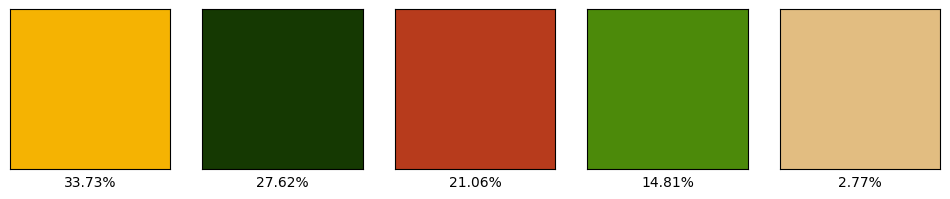

In [11]:
block = np.ones((50,50,3),dtype='uint')

plt.figure(figsize=(12,8))

for i in range(n_clusters):
    
    plt.subplot(1,n_clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

## 3- Better Visualization

### - Plotting Color Bar

([], [])

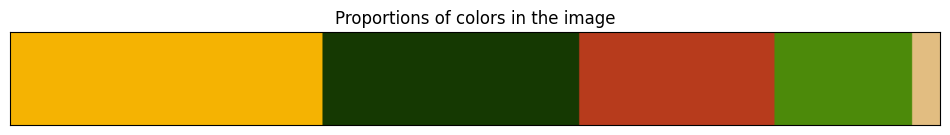

In [13]:
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1

for p,c in p_and_c:
    end = start+int(p*500)
    if i==n_clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])

### - Plotting on Finall Image

In [14]:
rows = 1000
cols = int((img.shape[0]/img.shape[1])*rows)
img = cv2.resize(img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+
                                             250,cols//2+110),(255,255,255),-1)

final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20


plt.show()

cv2.imshow('img',final)
cv2.waitKey(0)
cv2.destroyAllWindows()